# Credit Card Default Dataset (Default Prediction)

## 🎯 Objective  
Predict whether a credit card client will default on their payment next month using historical billing and repayment data.

This project explores a real-world financial classification problem using the Taiwan Credit Card Default dataset. The analysis focuses on identifying patterns in client demographics, bill amounts, and repayment behavior to build predictive models.

---

### 📂 Project Overview  
- **Goal**: Compare the performance of multiple classification algorithms on a financial risk prediction task.  
- **Models Evaluated**: Logistic Regression, K-Nearest Neighbors (KNN), and Random Forest.  
- **Techniques Applied**: Train/test split, GridSearchCV, cross-validation, and performance metrics such as accuracy and ROC AUC.

---

### 🧠 Why This Matters  
Accurately predicting credit default risk is critical for financial institutions to reduce losses, make informed lending decisions, and manage portfolio risk. This project simulates a typical pipeline used in credit scoring systems.


## 📘 Variable Dictionary — Credit Card Default Dataset

| **Variable**                 | **Description**                                                                 |
|------------------------------|----------------------------------------------------------------------------------|
| `ID`                         | Unique identifier for each client (not used in modeling)                        |
| `LIMIT_BAL`                  | Amount of credit granted (NT dollars), includes both individual and family credit |
| `SEX`                        | Gender (1 = male, 2 = female)                                                   |
| `EDUCATION`                  | Education level (1 = graduate school, 2 = university, 3 = high school, 4 = other)|
| `MARRIAGE`                   | Marital status (1 = married, 2 = single, 3 = others)                            |
| `AGE`                        | Age in years                                                                    |
| `PAY_0`                      | Repayment status in September (most recent); -1 = on time, 1 = 1 month delay, etc.|
| `PAY_2`                      | Repayment status in August                                                      |
| `PAY_3`                      | Repayment status in July                                                        |
| `PAY_4`                      | Repayment status in June                                                        |
| `PAY_5`                      | Repayment status in May                                                         |
| `PAY_6`                      | Repayment status in April                                                       |
| `BILL_AMT1`                  | Bill statement amount in September (NT dollars)                                 |
| `BILL_AMT2`                  | Bill statement amount in August                                                 |
| `BILL_AMT3`                  | Bill statement amount in July                                                   |
| `BILL_AMT4`                  | Bill statement amount in June                                                   |
| `BILL_AMT5`                  | Bill statement amount in May                                                    |
| `BILL_AMT6`                  | Bill statement amount in April                                                  |
| `PAY_AMT1`                   | Amount paid in September                                                        |
| `PAY_AMT2`                   | Amount paid in August                                                           |
| `PAY_AMT3`                   | Amount paid in July                                                             |
| `PAY_AMT4`                   | Amount paid in June                                                             |
| `PAY_AMT5`                   | Amount paid in May                                                              |
| `PAY_AMT6`                   | Amount paid in April                                                            |
| `default payment next month` | Target variable: 1 = client will default on payment next month, 0 = no default  |


## Setup

In [41]:
# Import required libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from google.colab import sheets

# Other libraries
import warnings
warnings.filterwarnings('ignore')

# ML Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# ML metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [42]:
# Upload the Dataset
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

## Exploraty Data Analysis (EDA)

In [43]:
# Inspect the first rows and columns
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
# Clean column names and spaces
df.columns = df.columns.str.strip()
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [45]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [46]:
# Visualize the amount of rows and columns
df.shape

(30000, 25)

In [47]:
# Inspect the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [48]:
# Count how many duplicated rows there are
df.duplicated().sum()

np.int64(0)

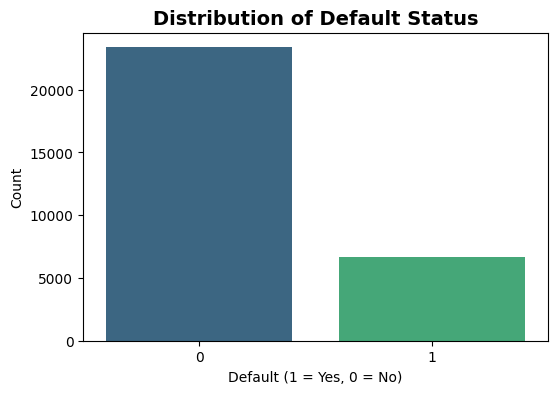

default
0    77.88%
1    22.12%
Name: proportion, dtype: object


In [49]:
# # Overview of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, palette='viridis')
plt.title('Distribution of Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

print(df['default'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

**Analysis:** This chart shows a clear class imbalance: about 78% of clients do not default, while only 22% do. This suggests that the dataset is skewed toward non-defaulting clients, which should be considered during model training — especially when selecting evaluation metrics like ROC AUC or F1-score instead of plain accuracy.

In [50]:
# Numerical summary
df.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='std', ascending=False)

,mean,std,min,max
LIMIT_BAL,167484.322667,129747.661567,10000.0,1000000.0
BILL_AMT1,51223.330900,73635.860576,-165580.0,964511.0
BILL_AMT2,49179.075167,71173.768783,-69777.0,983931.0
BILL_AMT3,47013.154800,69349.387427,-157264.0,1664089.0
BILL_AMT4,43262.948967,64332.856134,-170000.0,891586.0
BILL_AMT5,40311.400967,60797.155770,-81334.0,927171.0
BILL_AMT6,38871.760400,59554.107537,-339603.0,961664.0
PAY_AMT2,5921.163500,23040.870402,0.0,1684259.0
PAY_AMT6,5215.502567,17777.465775,0.0,528666.0
PAY_AMT3,5225.681500,17606.961470,0.0,896040.0


### Correlation Analysis (top 10 features only)

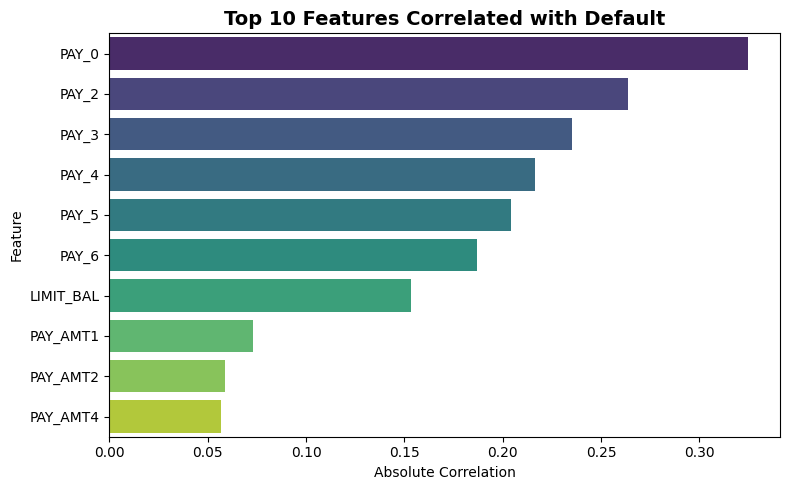

In [51]:
# Analyze correlations
target_corr = df.corr()['default'].drop('default')
top_corr = target_corr.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 10 Features Correlated with Default', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Analysis:** This chart shows that the strongest predictors of default are the recent repayment statuses (PAY_0 to PAY_6), especially PAY_0, which reflects the most recent month. A positive correlation indicates that late payments increase the likelihood of default. Lower correlations for LIMIT_BAL and PAY_AMT features suggest weaker predictive power, though they still contribute.

Note: A bar plot was chosen over a full correlation heatmap to improve readability, given the high number of features in the dataset.

### Correlations: Pearson / Kendall / Spearman

In [52]:
# Compute each correlation matrix
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

target_corrs = pd.DataFrame({
    'Pearson': corr_pearson['default'].drop('default'),
    'Kendall': corr_kendall['default'].drop('default'),
    'Spearman': corr_spearman['default'].drop('default')
}).sort_values(by='Pearson', ascending=False)

target_corrs.head(10)

,Pearson,Kendall,Spearman
PAY_0,0.324794,0.267885,0.292213
PAY_2,0.263551,0.201556,0.216919
PAY_3,0.235253,0.181077,0.194771
PAY_4,0.216614,0.162047,0.173690
PAY_5,0.204149,0.148829,0.159043
PAY_6,0.186866,0.133028,0.142523
EDUCATION,0.028006,0.042070,0.044369
AGE,0.013890,0.004273,0.005149
BILL_AMT6,-0.005372,-0.000063,-0.000076
BILL_AMT5,-0.006760,-0.005629,-0.006851


**Analysis:** All three correlation methods — Pearson, Kendall, and Spearman — consistently show that repayment status variables (PAY_0 to PAY_6) are the most strongly correlated with default. PAY_0 has the highest correlation across all methods, confirming recent payment behavior as a key predictor. Other variables like EDUCATION, AGE, and BILL_AMT show very weak or negative correlations, suggesting limited predictive power. The agreement across correlation types increases confidence in the feature relevance.

In [53]:
# Interactive Speadsheet
sheet = sheets.InteractiveSheet(df=target_corrs)

https://docs.google.com/spreadsheets/d/1hEU72vg86DEq_qieC-MvUh9nmC_Fd9ZV63WDboMIvZ0/edit#gid=0


## Univariate, Bivariate and Multivariate Analysis

### Credit Limit vs. Default

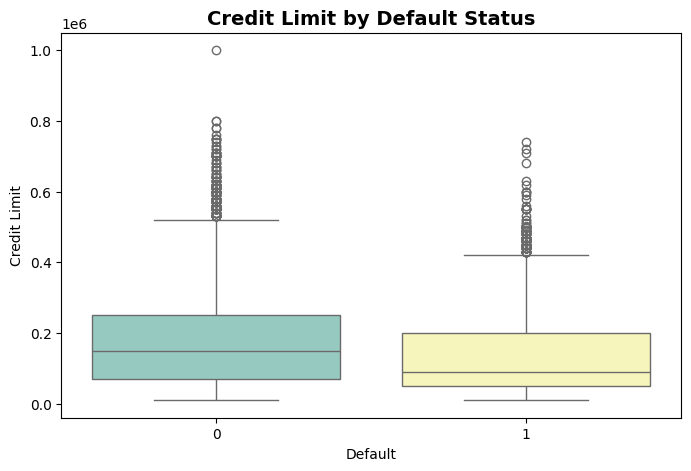

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='default', y='LIMIT_BAL', data=df, palette='Set3')
plt.title('Credit Limit by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default')
plt.ylabel('Credit Limit')
plt.show()

### Education, Gender and Marital Status

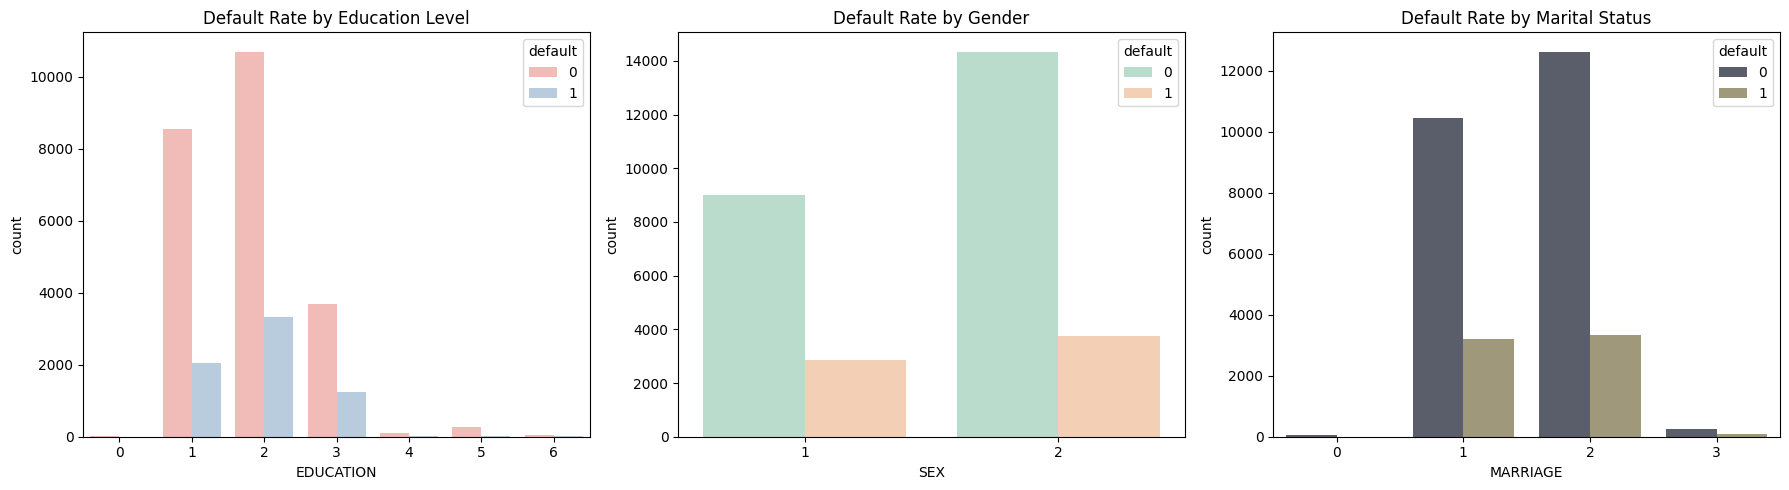

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='EDUCATION', hue='default', data=df, ax=axes[0], palette='Pastel1')
axes[0].set_title('Default Rate by Education Level')

sns.countplot(x='SEX', hue='default', data=df, ax=axes[1], palette='Pastel2')
axes[1].set_title('Default Rate by Gender')

sns.countplot(x='MARRIAGE', hue='default', data=df, ax=axes[2], palette='cividis')
axes[2].set_title('Default Rate by Marital Status')

plt.tight_layout()
plt.show()


## Outliers

### Outlier detection

In [56]:
# Select key numerical columns for analysis
cols_to_check = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_0', 'PAY_2', 'PAY_3'
]

df[cols_to_check].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0


**Analysis:** Several features exhibit strong evidence of outliers. BILL_AMT and PAY_AMT columns have negative minimum values (which may be invalid) and extremely high maximums, far above the 75th percentile. LIMIT_BAL also shows a large range, from 10,000 to 1,000,000. These values indicate high skewness and potential data quality issues. Outliers can negatively affect model performance — especially for algorithms sensitive to scale and distance (e.g., KNN, Logistic Regression). They can be addressed through techniques like capping (winsorization), log transformation, or scaling with robust methods to improve stability and generalization.

#### Visualize ouliers using boxplots

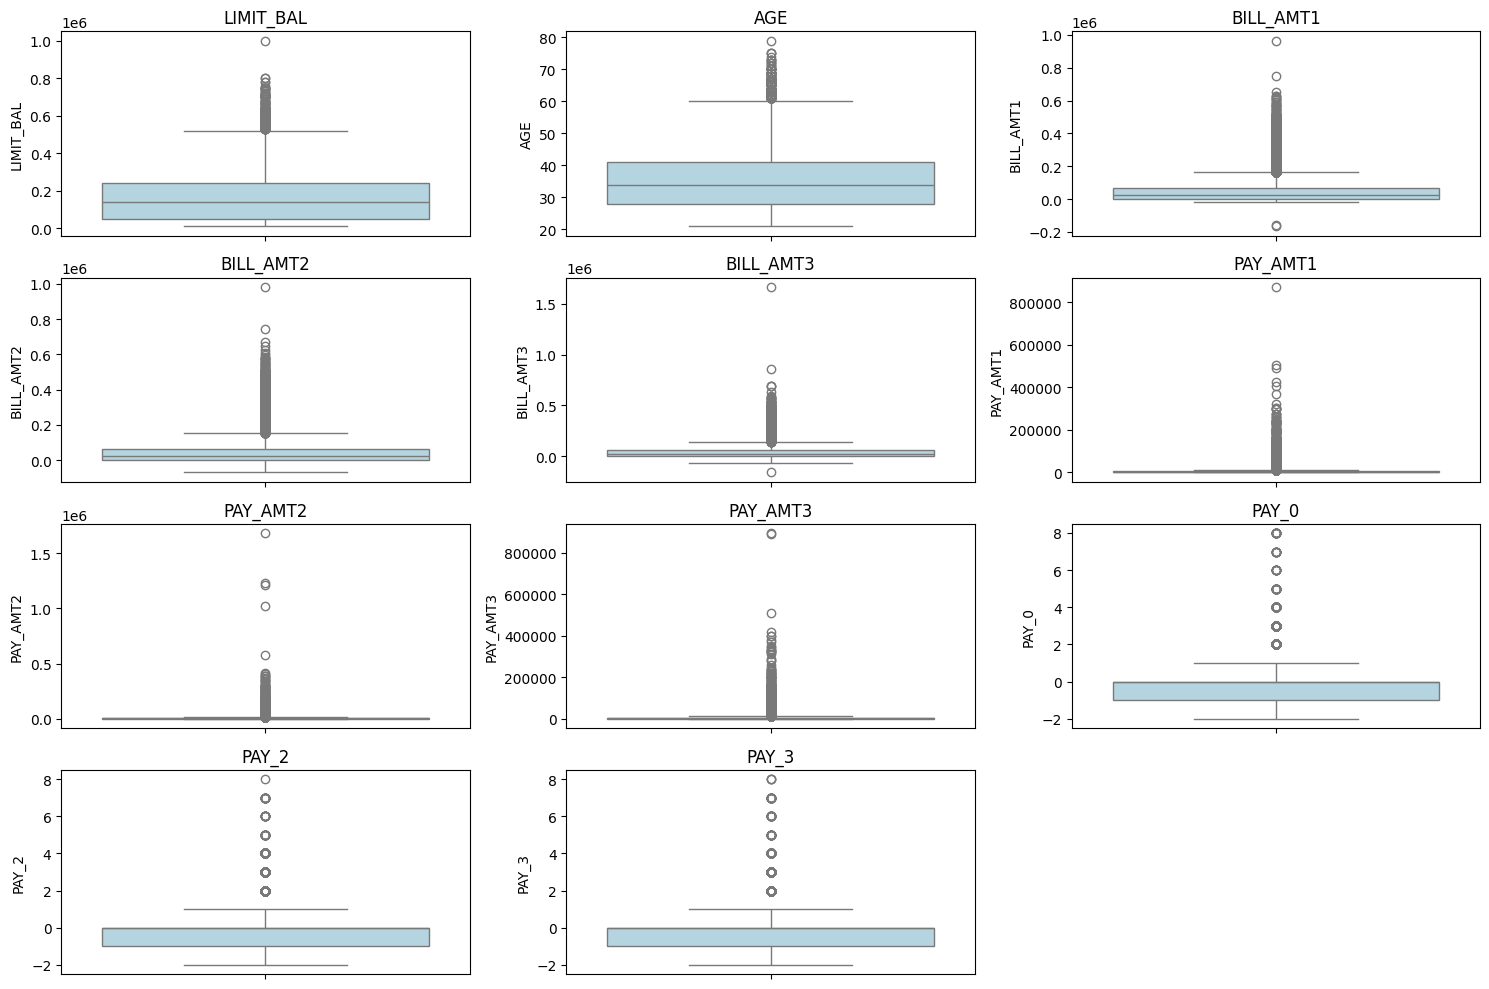

In [57]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

#### Zoom in on suspicious values

In [58]:
# Example: unusually high or negative bill amounts
df[df['BILL_AMT1'] < 0][['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].head()

# Example: negative or zero payments
df[df['PAY_AMT1'] == 0][['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']].shape

(5249, 3)

#### IQR/based outlier filtering

In [59]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Example: find outliers in 'LIMIT_BAL'
outliers_limit = detect_outliers_iqr(df, 'LIMIT_BAL')
print(f"Outliers in LIMIT_BAL: {outliers_limit.shape[0]}")

Outliers in LIMIT_BAL: 167


## Machine Learning - Preprocessing

In [60]:
# Drop the ID column (not useful for prediction)
df_clean = df.drop(columns=['ID'])

In [61]:
# Encode categorical features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df_clean[categorical_cols] = df_clean[categorical_cols].astype('category')

In [62]:
# Separate features and target
X = df_clean.drop(columns=['default'])
y = df_clean['default']

In [63]:
# Scale numerical features

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [64]:
# Train/Test split

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

## Machine Learning - Training

### Supervised Learning: Hyperparameter Tuning and Performance Comparison

#### Define models and hyperparameter grids

In [65]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    }
}

#### Use Stratified K-Fold for better class balance

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, mp in model_params.items():
    print(f"🔧 Tuning: {name}")

    grid = GridSearchCV(mp['model'], mp['params'], cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

🔧 Tuning: Logistic Regression
🔧 Tuning: KNN
🔧 Tuning: Random Forest


#### Create a summary table

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)

# Format results
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f"{x:.3f}")
results_df['F1 Score'] = results_df['F1 Score'].apply(lambda x: f"{x:.3f}")
results_df['ROC AUC'] = results_df['ROC AUC'].apply(lambda x: f"{x:.3f}")

# Display
display(results_df)

#### Visual comparison - Model performance chart

In [ ]:
# Melt the DataFrame for better plotting
plot_df = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score', 'ROC AUC'],
                          var_name='Metric', value_name='Score')

# Convert Score back to float for plotting
plot_df['Score'] = plot_df['Score'].astype(float)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()